# Principal Component Analysis with `python3`

## Preliminaries



`python3` offers a wide range of packages to perform ML and DL tasks:
+ [`numpy`](https://numpy.org/)
+ [`pandas`, Python Data Analysis Library](https://pandas.pydata.org/)
+ [`scikit-learn`, Machine Learning in Python](https://scikit-learn.org/stable/index.html)

In  the followig, we are going to exploit those tools to solve create non-parametric models to predict some quantities of interest. Let's upload those packages:

In [2]:
from IPython.display import Image

import numpy as np
import pandas as pd
import sklearn as skl

import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

Before getting started, a few general hints:

1. `lambda` constructors: they are used in `python` to define anonymous functions ([see this link](https://realpython.com/python-lambda/))




In [3]:
arr = np.array([1.5, 2.8, 3.1])
scale = lambda x: x * 3 
scale(arr)

array([4.5, 8.4, 9.3])

2. Handle `pandas` dataframe

In [4]:
Image(url="https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg",width=500)

In [5]:
# Empty dataframe
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [6]:
# Basic database
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df)

   0
0  1
1  2
2  3
3  4
4  5


In [7]:
# Database with column labels
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [8]:
# Repartitioning data into dataframe
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print(df)

     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


/tmp/ipykernel_16681/202426218.py:3: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)


In [9]:
# Deal with indices
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


3. plot data: ([see this link](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))



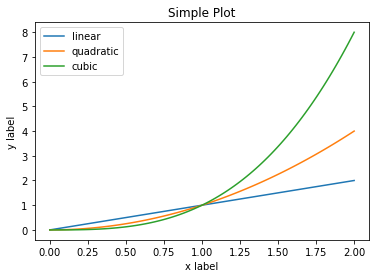

In [10]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

## Dataset

In this work, the Finite Element model of a masonry building is considered, that is schematized in the figure below:

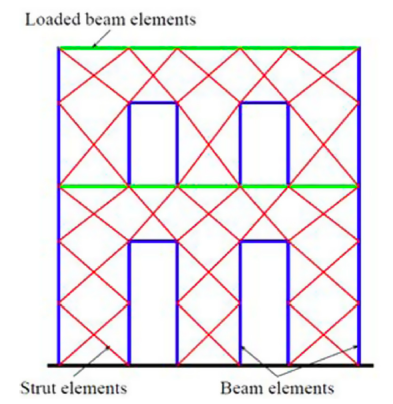

In [11]:
Image(filename="../imgs/masonry_building.png",width=400)

The behavior of this structure is simulated on the basis of non-linear dynamic FE analysis, all details of the model are well described in [1]. Using the FEM model, the inter-storey drifts of the building were calculated using 168 different earthquakes. Those inter-storey drift simulations represent the Engineering Demand parameters ED (matrix of $[1 \times 168]$) and they were computed by inputting 168 stochastic realizations of earthquake time-histories, obtained combining 13 different Intensity Measures (IM) proxies (IM: matrix of $[13\times168]$). 

The input databases are in file `mansonry_building_database.mat` [you can download here](https://github.com/FilLTP89/teaching/blob/master/datasets/mansonry_building_database.mat).

### Parse the dabase

In the following section, the database is parsed by loading it as a python dictionary:

In [13]:
from scipy.io import loadmat
link_to_mat_file="../datasets/mansonry_building_database.mat"
database=loadmat(link_to_mat_file)

In [14]:
IM=database['IM']
ED=database['ED']
print(IM.shape)
print(ED.shape)

(13, 168)
(1, 168)


## Principal Component Analysis

### Theoretical aspects

Imagine recording a phenomenon, described by $n$ variables $\left\lbrace x_i \right\rbrace_{i=1}^n$. Those $n$-dimensional observational data are observed $t$ times. The observations are stored in a $t\times n$ matrix $\mathbf{X}$, with $t$ observations for each of the $n$ variables:
$$\mathbf{X}=\begin{bmatrix} x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)}\\ x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)}\\ \ldots & \ldots & \ldots & \ldots\\ x_1^{(t)} & x_2^{(t)} & \ldots & x_n^{(t)}\\ \end{bmatrix} $$

The average values of each variable are stored in a $n\times 1$ vector called $\boldsymbol{\mu}_x$ :
$$\boldsymbol{\mu}_x^T=\begin{bmatrix} \frac{1}{n}\sum_{i=1}^t x_1^{(i)} & \frac{1}{n}\sum_{i=1}^t x_2^{(i)} & \ldots \frac{1}{n}\sum_{i=1}^t x_n^{(i)}  \end{bmatrix}$$

The $n\times n$ variance-covariance matrix $\mathbf{V}_{xx}$ reads instead:
$$\mathbf{V}_{xx}= \boldsymbol{X}^T\boldsymbol{\Delta}\boldsymbol{X}-\boldsymbol{\mu}_x \boldsymbol{\mu}_x^T$$

$\boldsymbol{\Delta}$ is the weight matrix and it is generally equal to $\frac{1}{n}\boldsymbol{I}$

The correlation matrix $\mathbf{R}_{xx}$ can be written as: 
$$\mathbf{R}_{xx}=\mathbf{D}_{xx}^{-\frac{1}{2}}\mathbf{V}_{xx}\mathbf{D}_{xx}^{-\frac{1}{2}}$$
where $\mathbf{D}_{xx}$ represents the diagonal of $\mathbf{V}_{xx}$

__EXERCISE__

From now on, consider $\mathbf{X}$ including both ED and IM as variables.
1. Plot the ED and IM distributions in separate figures.
2. Compute $\boldsymbol{\mu}_x$ 
3. Compute $\mathbf{V}_{xx}$ assuming $\boldsymbol{\Delta}=\frac{1}{n}\boldsymbol{I}$
4. Compute $\mathbf{R}_{xx}$
5. What does the digonal $\mathbf{D}_{xx}$ represent?

In [ ]:
### question 1.

In [ ]:
### question 2.

In [15]:
### question 3.

In [ ]:
### question 4.

In [16]:
### question 5.

Provided that both $\mathbf{V}_{xx}$ and $\mathbf{R}_{xx}$ are positive definite, their eigenvalues $\lambda_i$ are associated to the eigenvectors $\mathbf{v}_i$ and $\mathbf{u}_i=\mathbf{D}_{xx}^{\frac{1}{2}}\mathbf{v}_i\mathbf{D}_{xx}^{\frac{1}{2}}$:
$$\mathbf{V}_{xx}\mathbf{v}_i=\lambda_i\mathbf{D}_{xx}\mathbf{v}_i \qquad \mathbf{R}_{xx}\mathbf{u}_i=\lambda_i\mathbf{u}_i  $$

__EXERCISE__

6. Compute the _main factors_ $\mathbf{v}_i$ (Hint: use the `numpy` function `eigh` and sort the eigenvalues in descending order)
7. Compute the _principal directions_ $\mathbf{a}_i=\mathbf{D}_{xx}\mathbf{v}_i$
7. Verify numerically that $\mathbf{v}_i^T\mathbf{a}_j=\delta_{ij}$ 
8. Compute the _principal components_ $\mathbf{c}_i=\mathbf{X}\mathbf{v}_i$
10. Verify numerically that:
$$\lambda_i\boldsymbol{\Delta}\mathbf{c}_i=\boldsymbol{\Delta}\mathbf{X}\mathbf{D}_{xx}^{-1}\mathbf{X}^{T}\boldsymbol{\Delta}\mathbf{c}_i$$
11. What is the analytical value of $s_{c_i}^2=\mathbf{c}_i^T\boldsymbol{\Delta}\mathbf{c}_i$ (the variance of the i$^\text{th}$ component)?
12. Why are the eigenvalues called "explained variances"?
13. What is the value of the following expression (analytical and numerical):
$$\sum_{j=1}^n \rho^2(\mathbf{x}_j,\mathbf{c}_i)$$
(recall that $\rho(\mathbf{x}_j,\mathbf{c}_i)$ is the correlation coefficient between the i$^\text{th}$ component and the $\mathbf{x}_j$ variable observed, and it reads:
$$\rho(\mathbf{x}_j,\mathbf{c}_i)=\frac{\mathbf{x}^T_j\boldsymbol{\Delta}\mathbf{c}_i}{s_{c_i}s_{x_j}}$$

In [ ]:
### question 6.

In [ ]:
### question 7.

In [ ]:
### question 8.

In [ ]:
### question 9.

In [ ]:
### question 10.

In [40]:
### question 11.

In [41]:
### question 12.

In [ ]:
### question 13.

### PCA with `sklearn`

`sklearn` is a `python3` library that easily computes the PCA, via the class [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), as briefly shown in the tutorial below:

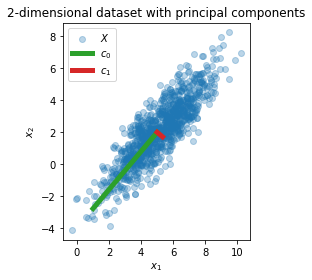

In [39]:
'''
PCA tutorial
https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
rng = np.random.RandomState(0)
n_samples = 1000

Cxx = [[3, 3], [3, 4]]
mux = [5, 2]
X = rng.multivariate_normal(mean=mux, cov=Cxx, size=n_samples)
pca = PCA(n_components=2).fit(X)

c = pca.components_
sigma2 = pca.explained_variance_

plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="$X$")
for i, (comp, var) in enumerate(zip(c, sigma2)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [mux[0],mux[0]+ comp[0]],
        [mux[1],mux[1]+ comp[1]],
        label=r"$c_{:d}$".format(i),
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel=r"$x_1$",
    ylabel=r"$x_2$",
)
plt.legend()
plt.show()

Text(0.5, 1.0, 'PCA of IRIS dataset')

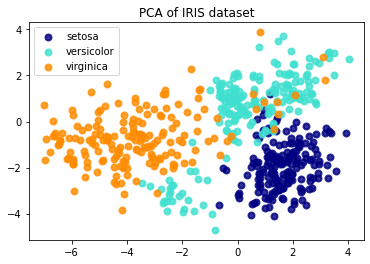

In [23]:
# Design PCA with two components
pca = PCA(n_components=2)

# Fit to the data and reconstruct
X_r = pca.fit(X).transform(X)

# Plot
plt.figure()


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

__EXERCISE__

12. Compute the PCA via `sklearn` on the dataset $\mathbf{X}$
13. Plot the 




## References

[1] Saez, E. Lopez-Caballero, F. and Modaressi Farahmand-Razavi, A. (2011) *Effect of the inelastic dynamic soil–structure interaction on the seismic vulnerability assessment*. Structural Safety 33 (2011) 51-63. doi:10.1016/j.strusafe.2010.05.004